In [9]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
# numpy is bitching about taking real part of complex number. i dont want to hear it.
import warnings
warnings.filterwarnings("ignore")

## Simulate self-affine 1d vector

In [29]:
# parameters
#####################
dx = 1 # grid spacing
nx = 1000 # length in units 
hurst = 0.5
seed = 420

def nextpow2(num):
    pow2 = 2
    while pow2 <= num:
        pow2 = pow2 * 2
    return pow2

def generate_colored_noise(hurst, nx, dx, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)
    beta = -2*(hurst+0.5)
    print('power law exponent: {}'.format(beta))
    # power -> amplitude
    beta = 0.5*beta
    n1n = nextpow2(np.rint(nx/dx))
    # radial wavenumber components
    dk1 = (1./n1n)*(2*np.pi/dx)
    knyq = np.pi / dx
    k1 = np.fft.fftshift(dk1*np.linspace(-n1n/2-1,n1n/2,n1n))
    kr = np.sqrt(k1**2)
    ampspec = kr**beta
    # simulate power law
    rf1d = ampspec*(np.random.randn(n1n)+1j*np.random.randn(n1n))
    # inverse transform; demean for plotting
    rf1d = np.real(np.fft.ifft(rf1d))-mean(rf1d)
    return rf1d

def update_plot(hurst=0.5):
    rf1d = generate_colored_noise(hurst, nx, dx, seed=seed)
    line.set_ydata(rf1d)
    ax = gca()
    ax.relim()
    ax.autoscale()
    fig.canvas.draw()

power law exponent: -2.0


<IPython.core.display.Javascript object>


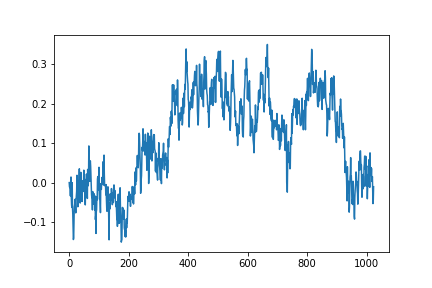

A Jupyter Widget

In [31]:
# seed figure with brownian noise
rf1d = generate_colored_noise(hurst, nx, dx, seed=seed)

# here is the interactive magic
fig = figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(rf1d)
_ = interact(update_plot)